# Principal Component Analysis for Visualization

Principal component analysis (PCA) is an unsupervised machine learning technique. Perhaps the most popular use of principal component analysis is dimensionality reduction. Besides using PCA as a data preparation technique, we can also use it to help visualize data. A picture is worth a thousand words. With the data visualized, it is easier for us to get some insights and decide on the next step in our machine learning models.


> In this tutorial, you will discover how to visualize data using PCA, as well as using visualization to help determining the parameter for dimensionality reduction.

# Scatter plot of high dimensional data

Visualization is a crucial step to get insights from data. We can learn from the visualization that whether a pattern can be observed and hence estimate which machine learning model is suitable.

It is easy to depict things in two dimension. Normally a scatter plot with x- and y-axis are in two dimensional. Depicting things in three dimensional is a bit challenging but not impossible. In matplotlib, for example, can plot in 3D. The only problem is on paper or on screen, we can only look at a 3D plot at one viewport or projection at a time. In matplotlib, this is controlled by the degree of elevation and azimuth. Depicting things in four or five dimensions is impossible because we live in a three-dimensional world and have no idea of how things in such a high dimension would look like.

This is where a dimensionality reduction technique such as PCA comes into play. We can reduce the dimension to two or three so we can visualize it. Let’s start with an example.

We start with the [wine dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset), which is a classification dataset with 13 features (i.e., the dataset is 13 dimensional) and 3 classes. There are 178 samples:

In [2]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X =", X.shape)
print("y =", y.shape)

X = (178, 13)
y = (178,)


Among the 13 features, we can pick any two and plot with matplotlib (we color-coded the different classes using the c argument):

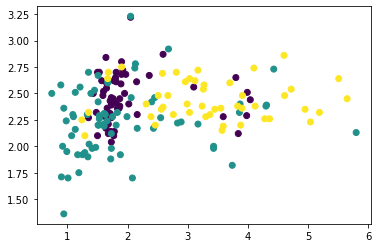

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

or we can also pick any three and show in 3D:

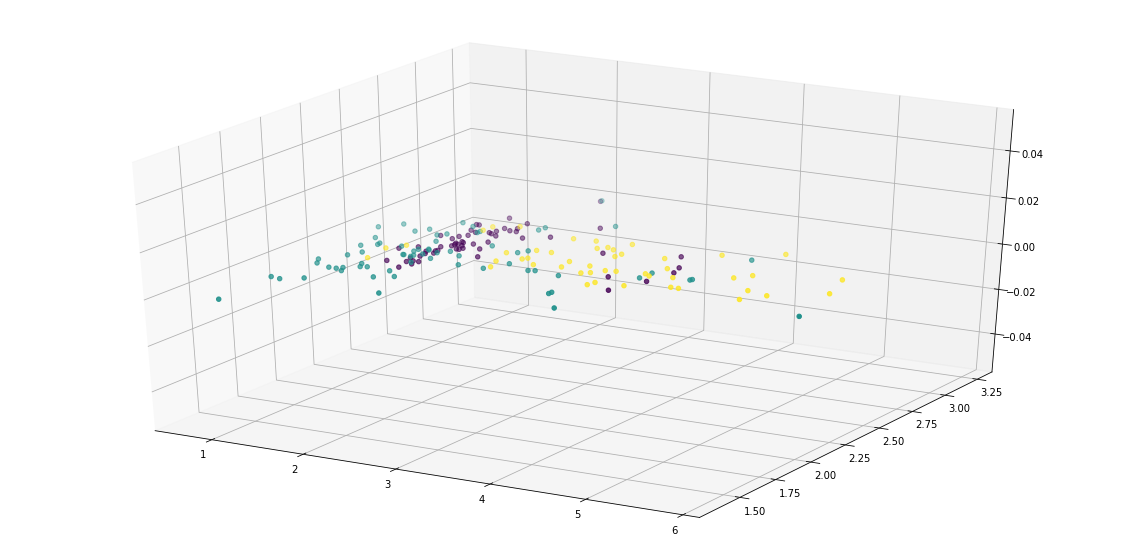

In [8]:
import matplotlib
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], c=y)
plt.show()

But this doesn’t reveal much of how the data looks like, because majority of the features are not shown. We now resort to principal component analysis:

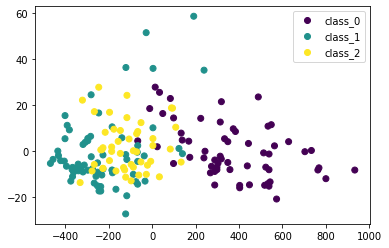

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

Here we transform the input data X by PCA into Xt. We consider only the first two columns, which contain the most information, and plot it in two dimensional. We can see that the purple class is quite distinctive, but there is still some overlap. If we scale the data before PCA, the result would be different:

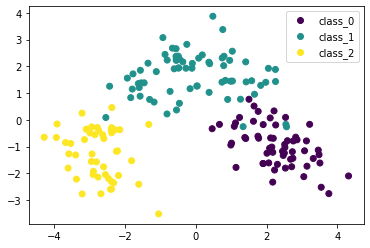

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

Because PCA is sensitive to the scale, if we normalized each feature by StandardScaler we can see a better result. Here the different classes are more distinctive. By looking at this plot, we are confident that a simple model such as SVM can classify this dataset in high accuracy.

Putting these together, the following is the complete code to generate the visualizations:

X shape: (178, 13)
y shape: (178,)


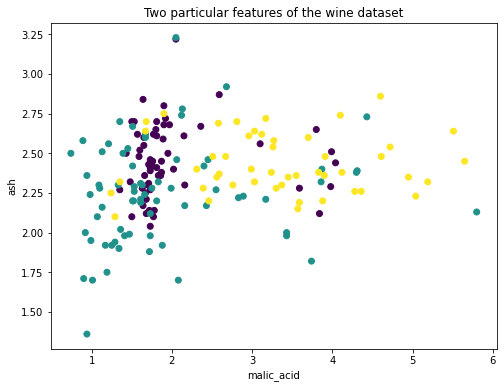

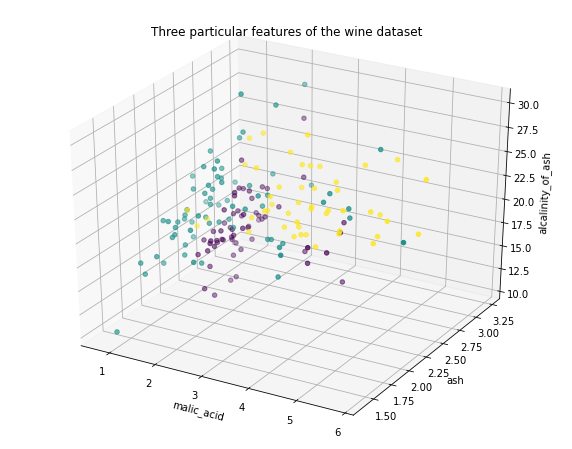

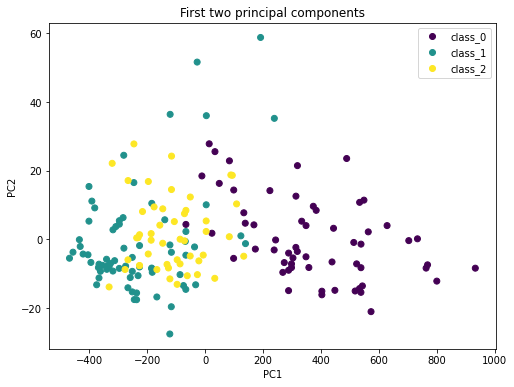

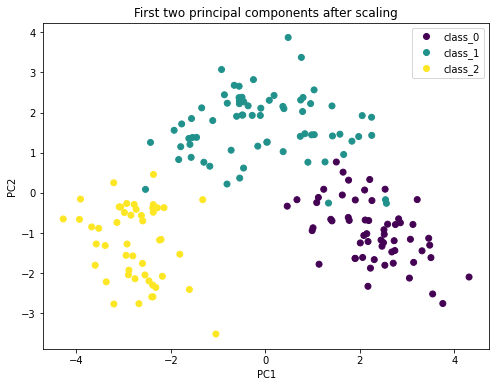

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
 
# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)
 
# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()
 
# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()
 
# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()
 
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()